In [16]:
pip install pytunneling

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=77c6dd35c3fa73f44cf45e698fce4e43d50e9bfd472ffdec64bc11b237a21876
  Stored in directory: c:\users\marri\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade numpy

Requirement already up-to-date: numpy in c:\users\marri\anaconda3\lib\site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import tensorflow as tf

In [ ]:
pip uninstall numpy

In [2]:
pip show numpy

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: NoneNote: you may need to restart the kernel to use updated packages.

License: BSD-3-Clause
Location: c:\users\marri\anaconda3\lib\site-packages
Requires: 
Required-by: xgboost, tifffile, tensorflow, tensorboard, tables, statsmodels, seaborn, scipy, scikit-learn, scikit-image, PyWavelets, pyarrow, pgmpy, patsy, pandas, opt-einsum, opencv-python, numexpr, numba, nlp, mkl-random, mkl-fft, matplotlib, Lifetimes, Keras-Preprocessing, imageio, h5py, Bottleneck, bokeh, bkcharts, astropy, altair


In [4]:
pip install --upgrade h5py

  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
Note: you may need to restart the kernel to use updated packages.    Uninstalling h5py-2.10.0:

      Successfully uninstalled h5py-2.10.0


In [105]:
import tensorflow as tf

# Initiated

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

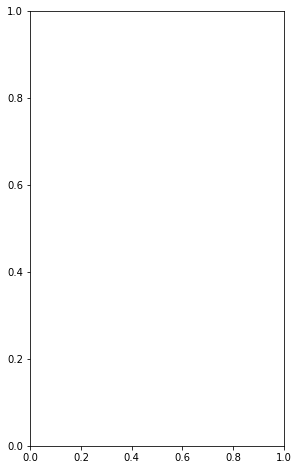

In [3]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.show()

In [4]:
tf.__version__

'2.7.0'

In [50]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    plt.plot(range(0,epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0,epochs_trained), h.history.get('val_accuracy'), label='Validation')
    
    plt.xlabel('Epoch')
    plt.ylim([0.,1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,2)
    plt.plot(range(0,epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0,epochs_trained), h.history.get('val_loss'), label='Validation')
    
    plt.xlabel('Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_confusion_matrix(y_true,y_pred,classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true,y_pred,normalize='true')
    
    plt.figure(figsize=(16,16))
    sp = plt.subplot(1,1,1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0,6)), labels=classes)
    plt.yticks(list(range(0,6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


### Import the data

In [19]:
pip install -U datasets

  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.50.2
    Uninstalling tqdm-4.50.2:
      Successfully uninstalled tqdm-4.50.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.3
    Uninstalling fsspec-0.8.3:
      Successfully uninstalled fsspec-0.8.3
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade fsspec


Requirement already up-to-date: fsspec in c:\users\marri\anaconda3\lib\site-packages (2023.6.0)Note: you may need to restart the kernel to use updated packages.



In [6]:
from datasets import load_dataset
dataset = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/marri/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [9]:
def get_tweet(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets,labels

In [10]:
tweets,labels = get_tweet(train)

In [11]:
tweets[0], labels[0]

('i didnt feel humiliated', 0)

In [12]:
tweets[1000], labels[1000]

('i need to do the best i possibly can do and even when i get out at i feel too listless to study like right now',
 0)

### Task4 Tokenizer

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer(num_words = 10000, oov_token='<UNK>')

In [15]:
tokenizer.fit_on_texts(tweets)

In [16]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [17]:
tweets[0]

'i didnt feel humiliated'

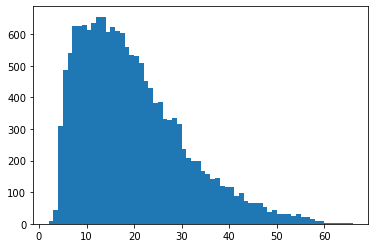

In [18]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins = len(set(lengths)))
plt.show()

In [19]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
def get_sequences(tokenizer,tweets):
    sequences=tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(sequences,truncating='post',padding = 'post', maxlen=maxlen)
    return padded

In [21]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [22]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

#### Task6 Preparing the labels
##### 1.Creating classes to index and index to classes dictionarires
##### 2. converting text labels to num

In [23]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
           0.,  572.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

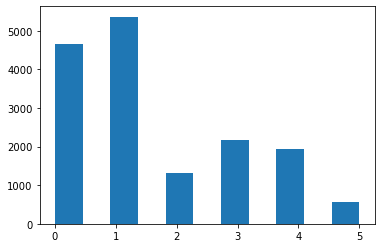

In [24]:
plt.hist(labels,bins=11)

In [25]:
classes_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in classes_to_index.items())

In [26]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [27]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [28]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [29]:
train_labels=names_to_ids(labels)

In [30]:
print(train_labels[0])

0


##### Task7: Creating the Model
###### 1.Creating the model
###### 2.Compiling the model

In [104]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [32]:
# compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


##### Task8: Training the Model

###### 1.Preparing a validation set
###### 2. Training the model

In [36]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [42]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [43]:
# train the model using model.fit
h = model.fit(padded_train_seq,train_labels,validation_data=(val_seq,val_labels),epochs=20,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
             )

Epoch 1/20
500/500 [==============================] - 17s 25ms/step - loss: 1.2777 - accuracy: 0.5019 - val_loss: 0.7546 - val_accuracy: 0.7390
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.5463 - accuracy: 0.8056 - val_loss: 0.5786 - val_accuracy: 0.8055
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3507 - accuracy: 0.8758 - val_loss: 0.5051 - val_accuracy: 0.8270
Epoch 4/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2498 - accuracy: 0.9116 - val_loss: 0.4818 - val_accuracy: 0.8515
Epoch 5/20
500/500 [==============================] - 12s 23ms/step - loss: 0.1905 - accuracy: 0.9391 - val_loss: 0.4307 - val_accuracy: 0.8570
Epoch 6/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1394 - accuracy: 0.9537 - val_loss: 0.4385 - val_accuracy: 0.8725
Epoch 7/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1158 - accuracy: 0.9610 - val_loss: 0.4355 - val_accuracy:

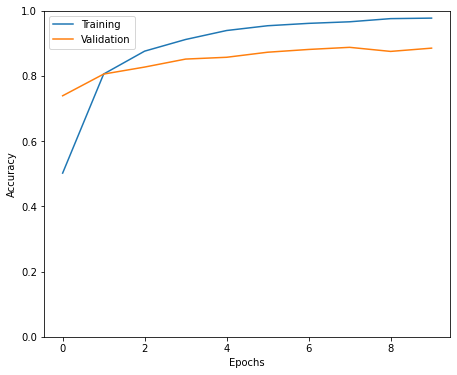

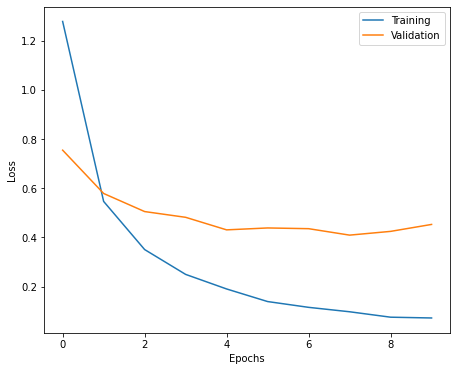

In [51]:
show_history(h)

In [55]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer,test_tweets)
test_labels = names_to_ids(test_labels)

In [57]:
model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.4140 - accuracy: 0.8915


[0.4139672517776489, 0.8914999961853027]

In [84]:
for idx in range(len(p)):
    print(idx,p[idx])
np.argmax(p)

0 0.008346412
1 0.16600573
2 0.82128537
3 0.0011707194
4 0.00070498686
5 0.002486856


2

In [85]:
# take a look at few predictions manually

i = random.randint(0,len(test_labels)-1)
print('Sentence:',test_tweets[i])
print('Emotion:',index_to_class[test_labels[i]])

# to predict we have to expand dimension of sequence
p = model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion ',pred_class)

Sentence: i enjoy the day more when i feel cute
Emotion: 1
Predicted Emotion  1


In [99]:
# all the predictions
pred_probs = model.predict(test_seq)
pred_classes =np.argmax(pred_probs,axis=1)

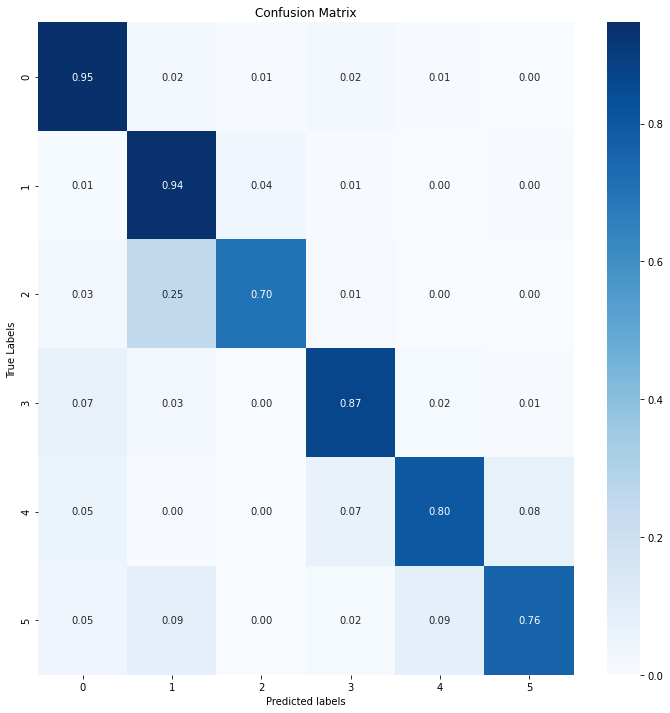

In [102]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to class indices
pred_classes = np.argmax(pred_probs, axis=1)

# Convert test_labels to the appropriate data type if needed
test_labels = test_labels.astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_labels, pred_classes, normalize='true')

class_label=list(classes)
# Continue with the rest of the code to plot the confusion matrix
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f',xticklabels=class_label,yticklabels=class_label)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
